**Course Name:** Pattern Recognition Lab<br>
**Couse No:** CSE4214<br>
**Experiment Name:** Implementing Minimum Error Rate Classifier<br>
**Name:** MD. Faisal Ahmed<br>
**Section:** A2 <br>
**ID:**16.01.04.046


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_csv.csv to Data_csv.csv


In [ ]:
def split_samples(df, label):
  return df[df['Class'] == label]

In [ ]:
def calculate_mean(df):

  f1_mean = df['Feature1'].mean()
  f2_mean = df['Feature2'].mean()

  return np.array([f1_mean, f2_mean]).reshape((2, 1))

In [ ]:
def calculate_covariance(df):
  # pass

  df = df.drop(['Class'], axis = 1)
  return df.cov()

In [ ]:
def calculate_likelihood(x, cls_mean, covariance, covariance_inv):
  # pass
  x_u = x - cls_mean
  x_u_t = x_u.T  

  # print(x_u_t.shape)

  temp = np.dot(x_u_t, covariance_inv)
  temp = np.dot(temp, x_u)
  # print(temp.shape)
  temp = -0.5 * temp
  e = math.exp(temp)

  temp = math.pow(2 * math.pi, 2)
  det = np.linalg.det(covariance)
  temp = temp * det
  temp = 1 / math.sqrt(temp)
  
  return temp * e

Accuracy =  100.0


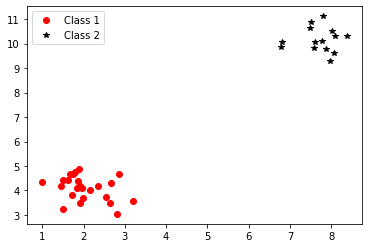

In [ ]:
def naive_bayes():

  df = pd.read_csv('Data_csv.csv')

  np.random.seed(0)
  msk = np.random.rand(len(df)) < 0.6

  train = df[msk]
  test = df[~msk]

  cls_1 = split_samples(train, 1)
  cls_2 = split_samples(train, 2)

  cls_1_mean = calculate_mean(cls_1)
  cls_2_mean = calculate_mean(cls_2)

  prior_1 = len(cls_1) / len(df)
  prior_2 = len(cls_2) / len(df)

  covariance_1 = calculate_covariance(cls_1)
  covariance_2 = calculate_covariance(cls_2)
  
  covariance_1_inv = np.linalg.inv(covariance_1)
  covariance_2_inv = np.linalg.inv(covariance_2)

  cnt = 0

  cls_1_x = []
  cls_1_y = []
  cls_2_x = []
  cls_2_y = []

  for ind, row in test.iterrows():
    x = np.array([row[0], row[1]]).reshape((2, 1))
    posterior_1 = calculate_likelihood(x, cls_1_mean, covariance_1, covariance_1_inv) * prior_1
    posterior_2 = calculate_likelihood(x, cls_2_mean, covariance_2, covariance_2_inv) * prior_2 

    if(posterior_1 > posterior_2 and row[2] == 1):
      cnt += 1
      cls_1_x.append(row[0])
      cls_1_y.append(row[1])
    elif(posterior_2 >= posterior_1 and row[2] == 2):
      cnt += 1
      cls_2_x.append(row[0])
      cls_2_y.append(row[1])
  
  plt.pyplot.plot(cls_1_x, cls_1_y, 'ro', label = 'Class 1')
  plt.pyplot.plot(cls_2_x, cls_2_y, 'k*', label = 'Class 2')
  plt.pyplot.legend(loc='best')

  accuracy = (cnt / len(test)) * 100

  print("Accuracy = ", accuracy)

naive_bayes()

In [ ]:
print(cls_1.shape)
print(cls_2.shape)
print(train.shape)
print(cls_1_mean)
print(cls_1_mean.shape)
print(test.shape)

(26, 3)
(36, 3)
(62, 3)
[[1.99888077]
 [4.01570769]]
(2, 1)
(38, 3)


In [ ]:
y = np.random.rand(100)
y.shape

(100,)